In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
CANDIDATE = 'lula'
#CANDIDATE = 'bolsonaro'

In [3]:
SOCIAL_NETS = [
  #'facebook', 
  #'tiktok', 
  'instagram'
  ]

In [4]:
select_file = ""
if (len(SOCIAL_NETS) == 1):
  select_file = f"{SOCIAL_NETS[0]}"
select_file += f"-{CANDIDATE}"

select_file

'instagram-lula'

# 1 - Dados dos Posts

In [5]:
input_folder = '../outputs/normalize_posts/'
file = f"2. Normalized-{select_file}.csv"
file_path = os.path.join(input_folder, file)

In [6]:
# DataFrame with columns:
# ID (of the post), Autor, Data (date), Class (tag), Curtidas, Comentários, Compart., Curtidas Normalizadas
if(file_path.endswith(".xlsx")):
  df_posts = pd.read_excel(file_path)
else:
  df_posts = pd.read_csv(file_path)
  df_posts = df_posts.loc[df_posts['Rede'].isin(SOCIAL_NETS)]

In [7]:
df_posts.drop(columns=['Texto', 'Hora', 'Data', 'Tipo'], inplace=True)
df_posts.shape

(5404, 9)

In [8]:
df_posts.head(10)

,ID,Autor,Link,Rede,Curtidas,Comentários,Compart.,Curtidas Normalizadas,Class
0,17956358962890471,Lula,https://www.instagram.com/reel/Cfbm9RcghQB/,instagram,15445,509,0,0.000000,Wrinkle
1,17956358962890471,Lula,https://www.instagram.com/reel/Cfbm9RcghQB/,instagram,15445,509,0,0.000000,Font
2,17956358962890471,Lula,https://www.instagram.com/reel/Cfbm9RcghQB/,instagram,15445,509,0,0.000000,Adaptation
3,17956358962890471,Lula,https://www.instagram.com/reel/Cfbm9RcghQB/,instagram,15445,509,0,0.000000,Happy
4,17956358962890471,Lula,https://www.instagram.com/reel/Cfbm9RcghQB/,instagram,15445,509,0,0.000000,Gesture
5,17956358962890471,Lula,https://www.instagram.com/reel/Cfbm9RcghQB/,instagram,15445,509,0,0.000000,Joy
6,17956358962890471,Lula,https://www.instagram.com/reel/Cfbm9RcghQB/,instagram,15445,509,0,0.000000,Sad
7,17847963803795429,Lula,https://www.instagram.com/reel/Cfb6c5tgiv-/,instagram,38104,1775,0,0.008785,Clothing
8,17847963803795429,Lula,https://www.instagram.com/reel/Cfb6c5tgiv-/,instagram,38104,1775,0,0.008785,Publication
9,17847963803795429,Lula,https://www.instagram.com/reel/Cfb6c5tgiv-/,instagram,38104,1775,0,0.008785,Font


In [9]:
df_posts.isna().sum().sum() == 0

True

In [10]:
len( df_posts['Autor'].unique() ) == 1

True

# 2 - EDA sobre Posts e Métricas de Engajamento

In [11]:
df_posts_no_tags = df_posts[['ID', 'Curtidas', 'Curtidas Normalizadas', 'Comentários', 'Compart.', 'Rede']].drop_duplicates()

### Distribuição das Curtidas

In [12]:
# Mostra um gráfico com o histograma das curtidas normalizadas
def plot_hist(df, dimension_name, bins=50, log=False):
    #assert df[['ID', dimension_name]].duplicates() == 0
    df = df[['ID', dimension_name]].drop_duplicates()
    dseries = df[dimension_name]
    if log:
        dseries = np.log(df[dimension_name])
    # set "-Inf" to a very small negative number
    dseries = dseries.replace(-np.Inf, np.log(0.001))
    sns.set()
    plt.figure(figsize=(10, 5))
    plt.hist(dseries, bins=bins)
    if log:
        plt.title(f'Histograma - {dimension_name} (log)')
    else:
        plt.title('Histograma - '+ dimension_name)
    plt.xlabel(dimension_name)
    plt.ylabel('Frequência')
    plt.show()

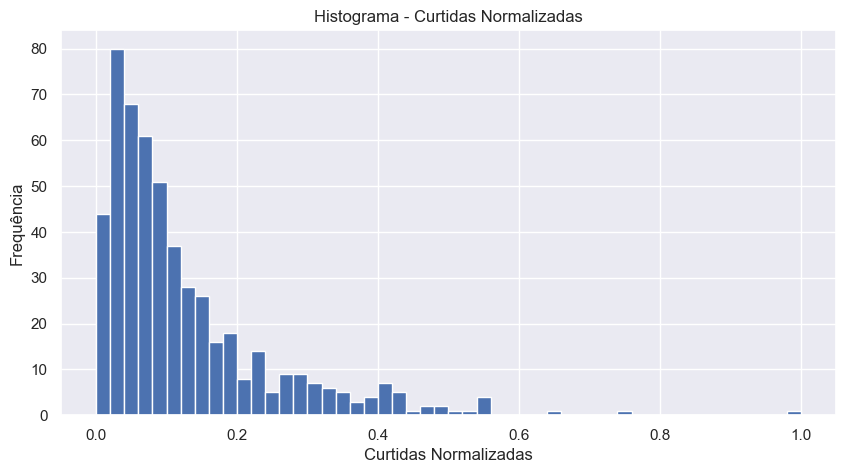

In [13]:
plot_hist(df_posts_no_tags, 'Curtidas Normalizadas')

c:\Users\Admin\Documents\sm-computer-vision\0. Refactored\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


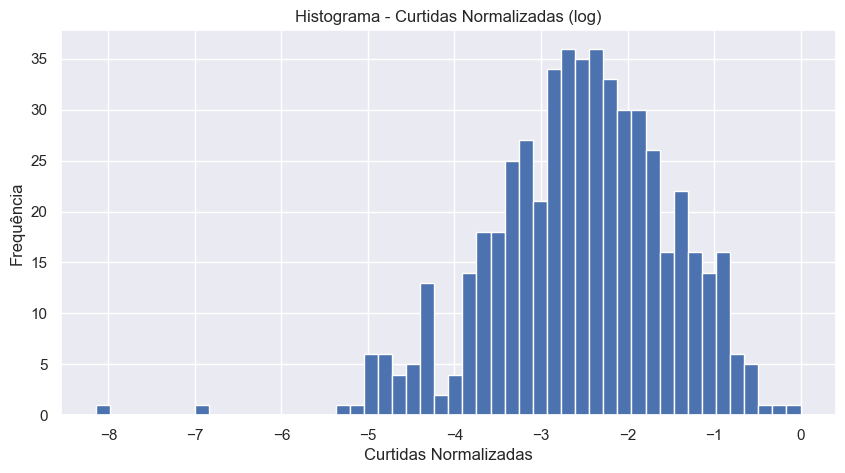

In [14]:
# Mostra na escala log
plot_hist(df_posts_no_tags, 'Curtidas Normalizadas', log=True)

In [15]:
# Mostra na escala log - as curtidas 'RAW' - dá diferenças por conta das distribuições diferentes em cada rede
#plot_hist(df_posts_no_tags, 'Curtidas', log=True)

'Rede social: INSTAGRAM'

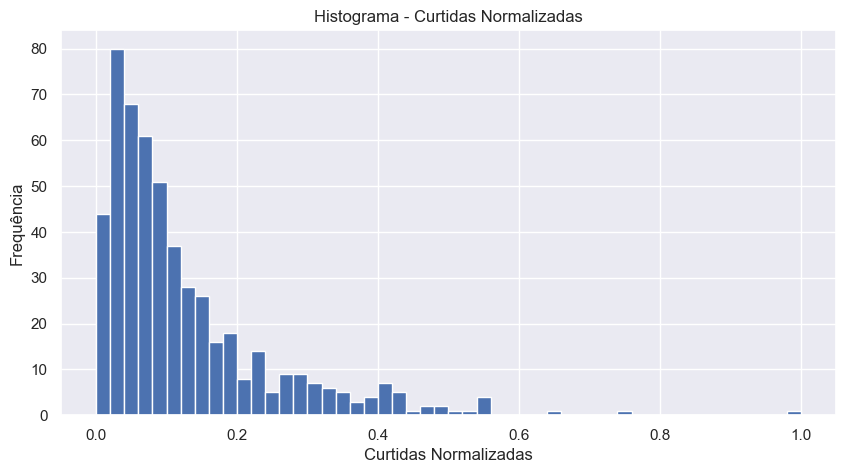

c:\Users\Admin\Documents\sm-computer-vision\0. Refactored\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


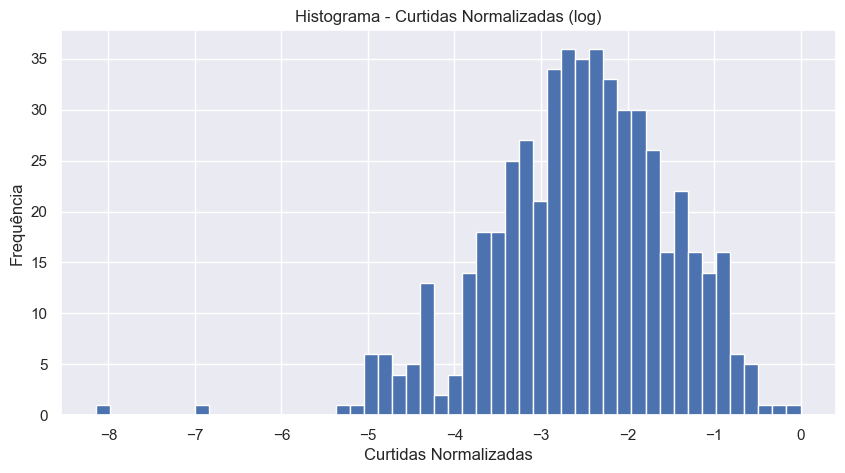

''

In [16]:
# Create plots of the normalized likes, for each social network
#'''
for rede in SOCIAL_NETS:
    df_aux = df_posts_no_tags[df_posts_no_tags['Rede'] == rede]
    display(f"Rede social: {rede.upper()}")
    plot_hist(df_aux, 'Curtidas Normalizadas', log=False)
    plot_hist(df_aux, 'Curtidas Normalizadas', log=True)
''' #'''
;

### Curtidas vs Comentários (escala log)

In [17]:
from scipy.stats import pearsonr
for network in SOCIAL_NETS:
    df_aux = df_posts_no_tags[df_posts_no_tags['Rede'] == network]
    print(f"Rede social: {network.upper()}")
    # correlation between likes and other metrics of engagement
    print("Correlação likes-comentários", pearsonr(df_aux['Curtidas'], df_aux['Comentários'])[0])
    print("Correlação likes-compartilhamentos", pearsonr(df_aux['Curtidas'], df_aux['Compart.'])[0])
    print()

Rede social: INSTAGRAM
Correlação likes-comentários 0.8153739525001421
Correlação likes-compartilhamentos nan



C:\Users\Admin\AppData\Local\Temp\ipykernel_4544\3736101649.py:7: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  print("Correlação likes-compartilhamentos", pearsonr(df_aux['Curtidas'], df_aux['Compart.'])[0])


Compara as *curtidas* com outras métricas de engajamento.

<Axes: xlabel='Curtidas', ylabel='Comentários'>

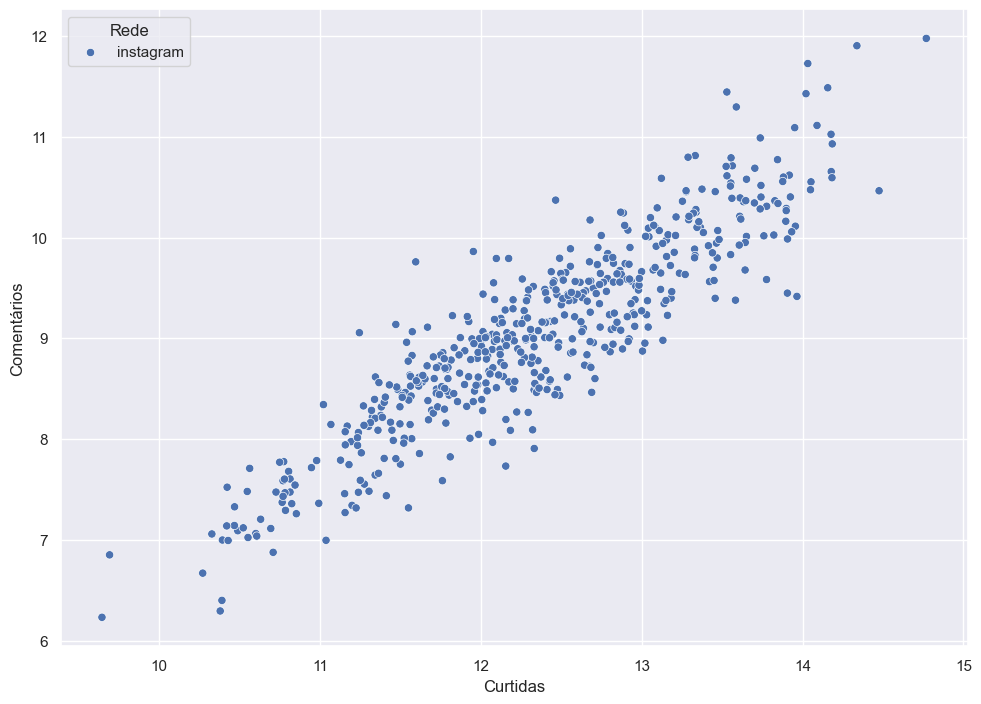

In [18]:
# A scatter plot comparing Curtidas vs Comentários, to verify if there is a correlation between them
# Each dimension is considered in the log scale
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x=np.log(df_posts_no_tags['Curtidas']), y=np.log(df_posts_no_tags['Comentários']), hue=df_posts_no_tags['Rede'], palette="deep")


,ID,Curtidas,Curtidas Normalizadas,Comentários,Compart.,Rede


(0, 6)

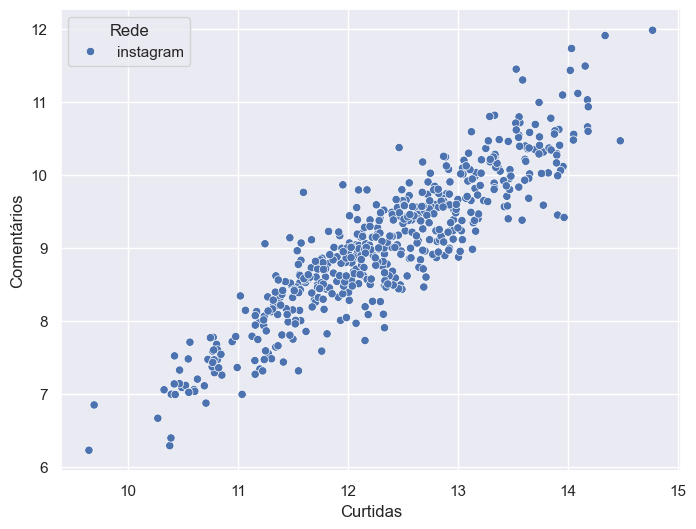

In [19]:
# análise de posts esquisitos de Lula
if CANDIDATE == 'lula':
    # filtra os dados das curtidas 
    filter = ((df_posts_no_tags['Rede'] == 'facebook') & (df_posts_no_tags['Curtidas'] == 10_000))
    df_aux = df_posts_no_tags[filter]
    display(df_aux.head(5))
    display(df_aux.shape)

    df_posts[df_posts['ID'].isin(df_aux['ID'])].to_excel('outputs/lula-posts-esquisitos.xlsx', index=False)

    df_aux = df_posts_no_tags[~filter]
    sns.set_theme(style="darkgrid")
    sns.set(rc={'figure.figsize':(8,6)})
    sns.scatterplot(x=np.log(df_aux['Curtidas']), y=np.log(df_aux['Comentários']), hue=df_aux['Rede'], palette="deep")

REMOVE = False
if REMOVE:
    df_posts_no_tags.drop(df_posts_no_tags[df_posts_no_tags['Curtidas'] == 10_000].index, inplace=True)

### Curtidas vs Compartilhamentos (escala log)

c:\Users\Admin\Documents\sm-computer-vision\0. Refactored\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: >

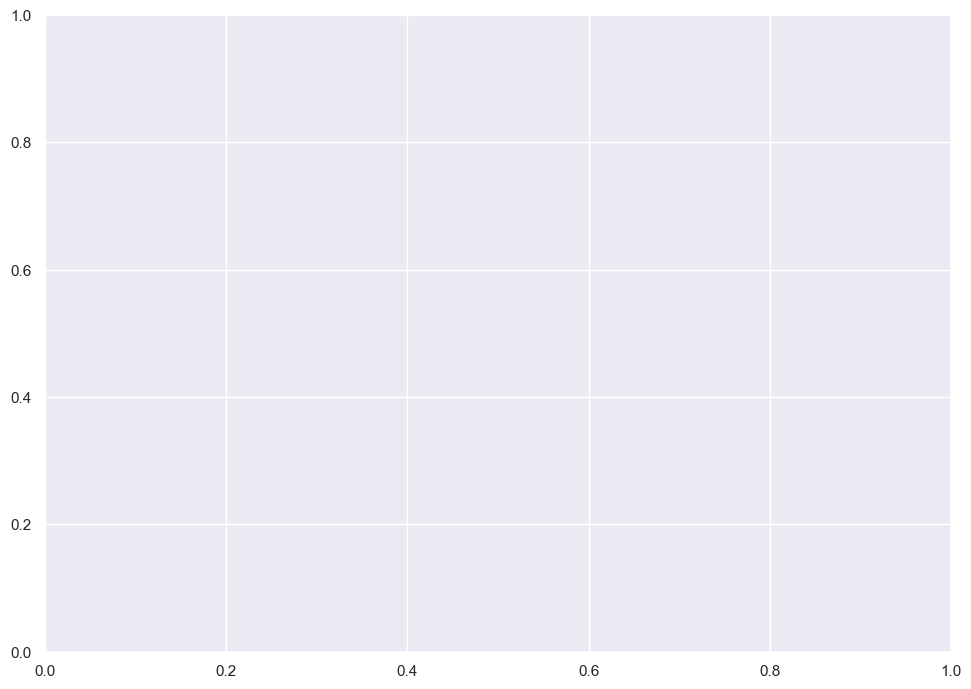

In [20]:
# A scatter plot comparing Curtidas vs Compartilhamentos, to verify if there is a correlation between them
# Each dimension is considered in the log scale
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x=np.log(df_posts_no_tags['Curtidas']), y=np.log(df_posts_no_tags['Compart.']), hue=df_posts_no_tags['Rede'], palette="deep")

### Matriz de Correlações (escala log)

In [21]:
# Calcula matriz de correlaões (na escala log) entre 'Curtidas', 'Coments.', 'Comentários'
np.log(df_posts[['Curtidas', 'Comentários', 'Compart.']]).corr()

c:\Users\Admin\Documents\sm-computer-vision\0. Refactored\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,Curtidas,Comentários,Compart.
Curtidas,1.000000,0.906805,NaN
Comentários,0.906805,1.000000,NaN
Compart.,NaN,NaN,NaN


In [22]:
# Total de tags distintas nas postagens
len(df_posts['Class'].unique())

353

# 3 - Carrega as Tags que Passaram no Teste Estatístico

In [23]:
input_folder = "../outputs/statistical_tests/classes"
file = f"4. Statistical_Test-{select_file}.csv"
file_path = os.path.join(input_folder, file)

In [24]:
# carrega todas tags, junto com os resultados do teste estatístico
if(file_path.endswith('.xlsx')):
  df_tags = pd.read_excel(file_path)
else:
  df_tags = pd.read_csv(file_path)
df_tags.groupby('Classification').count()

,Class,P-Value - ts,P-Value - greater,P-Value - less
Classification,,,,
greater,10,10,10,10
less,5,5,5,5
none,338,338,338,338


In [25]:
# Filtra apenas as tags associadas a diferenças de engajamento (greater ou less)
df_tags = df_tags.loc[df_tags['Classification'] != 'none']
df_tags.reset_index(drop=True, inplace=True)

In [26]:
# A Data Frame with columns: Class (tags), and Classification (statistical test)
# (classification -> 'less' indicate the the tag reduces the number of likes, 'greater' indicates that the tag increases the number of likes)
df_tags.head()

,Class,P-Value - ts,P-Value - greater,P-Value - less,Classification
0,Blazer,0.008095,0.004047,0.995964,greater
1,Chin,0.005024,0.002512,0.997495,greater
2,City,0.004549,0.002275,0.997740,greater
3,Daytime,0.006737,0.003369,0.996654,greater
4,Eyebrow,0.000143,0.000071,0.999929,greater


In [27]:
df_tags['Class'].duplicated().sum()

0

In [28]:
selected_tags = df_tags['Class'].unique()
selected_tags

array(['Blazer', 'Chin', 'City', 'Daytime', 'Eyebrow', 'Finger', 'Font',
       'Happy', 'Natural environment', 'Nose', 'Publication', 'Skin',
       'Skyscraper', 'Thumb', 'Youth'], dtype=object)

In [29]:
print(f"Total de tags de {CANDIDATE.upper()} selecionadas no teste:", len(selected_tags))

Total de tags de LULA selecionadas no teste: 15


# 4 - Tags Presentes nos "Top" Posts com Mais Curtidas

In [30]:
TOP_POSTS_OVERALL = 100

### 4.1 - Análise Geral (TODAS as redes)

In [31]:
# Ordena os posts da rede por curtidas normalizadas
df_top_posts = df_posts.sort_values(by=['Curtidas Normalizadas'], ascending=False)

In [32]:
# Seleciona os top IDs com mais curtidas
top_ids = df_top_posts['ID'].drop_duplicates().head(TOP_POSTS_OVERALL).values
len(top_ids)

100

In [33]:
# Seleciona os posts com os top IDs
df_top_posts = df_top_posts.loc[df_top_posts['ID'].isin(top_ids)]
df_top_posts.reset_index(drop=True, inplace=True)
df_top_posts.head(10)

,ID,Autor,Link,Rede,Curtidas,Comentários,Compart.,Curtidas Normalizadas,Class
0,17937610781414329,Lula,https://www.instagram.com/p/CjNufRQud1B/,instagram,2594701,159126,0,1.0,Speech
1,17937610781414329,Lula,https://www.instagram.com/p/CjNufRQud1B/,instagram,2594701,159126,0,1.0,Spokesperson
2,17937610781414329,Lula,https://www.instagram.com/p/CjNufRQud1B/,instagram,2594701,159126,0,1.0,Electronic device
3,17937610781414329,Lula,https://www.instagram.com/p/CjNufRQud1B/,instagram,2594701,159126,0,1.0,Audio equipment
4,17937610781414329,Lula,https://www.instagram.com/p/CjNufRQud1B/,instagram,2594701,159126,0,1.0,Person
5,17937610781414329,Lula,https://www.instagram.com/p/CjNufRQud1B/,instagram,2594701,159126,0,1.0,Microphone
6,17937610781414329,Lula,https://www.instagram.com/p/CjNufRQud1B/,instagram,2594701,159126,0,1.0,Gesture
7,17937610781414329,Lula,https://www.instagram.com/p/CjNufRQud1B/,instagram,2594701,159126,0,1.0,Coat
8,17937610781414329,Lula,https://www.instagram.com/p/CjNufRQud1B/,instagram,2594701,159126,0,1.0,Suit
9,17937610781414329,Lula,https://www.instagram.com/p/CjNufRQud1B/,instagram,2594701,159126,0,1.0,Blazer


In [34]:
assert df_top_posts['ID'].unique().shape[0] == TOP_POSTS_OVERALL
df_top_posts[['ID', 'Rede']].drop_duplicates()['Rede'].value_counts().reset_index()

,Rede,count
0,instagram,100


In [35]:
print('Faixa de valores das curtidas normalizadas:', df_top_posts['Curtidas Normalizadas'].min(), '-', df_top_posts['Curtidas Normalizadas'].max())

Faixa de valores das curtidas normalizadas: 0.195368 - 1.0


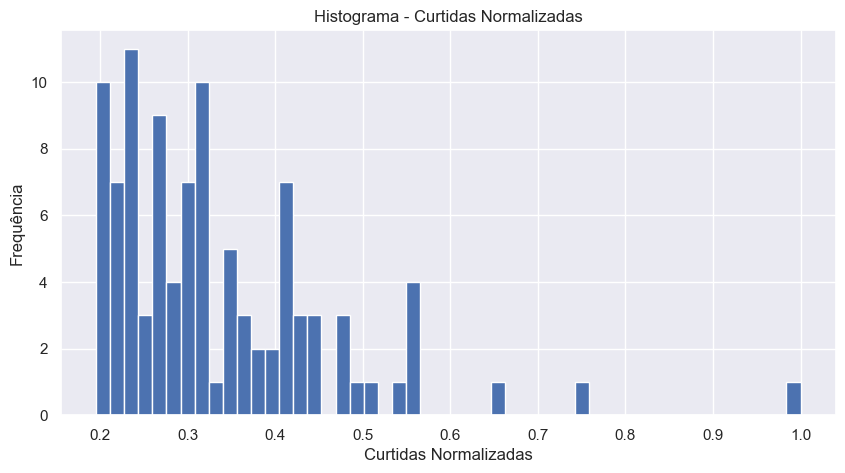

In [36]:
# Mostra histograma das curtidas normalizadas dos top posts
plot_hist(df_top_posts, 'Curtidas Normalizadas')

In [37]:
color = [
  "#87CEFA", 
  "#98FB98", 
  '#BC8F8F', 
  '#9370DB', 
  "#ADFF2F", 
  '#FF6347', 
  '#FFF950', 
  '#FF4500', 
  "#4682B4", 
  '#D2691E',
]

In [38]:
# Conta as ocorrências de cada tag nos top posts
# E mostra um gráfico de barras (por rede) indicando a quantidade de ocorrências de cada tag
def plot_top_tags(df_top_posts, df_tags, name, top_n=10):
    # faz o merge entre os top posts e as tags 
    df_aux = df_top_posts.merge(df_tags, on='Class', how='inner')
    df_aux = df_aux.groupby('Class').count()['ID'].sort_values(ascending=False)
    df_aux = df_aux.reset_index()
    df_aux.rename(columns={'ID': 'Ocorrências'}, inplace=True)

    # ordena as tags por ocorrências, e seleciona as top_n mais frequentes
    df_aux = df_aux.sort_values(by=['Ocorrências'], ascending=False)
    df_aux = df_aux.head(top_n)

    sns.set(rc={'figure.figsize':(11.7,8.27)})
    #sns.barplot(x='Class', y='Ocorrências', data=df_aux)
    plt.bar(x="Class", height="Ocorrências", data=df_aux, color=color)
    plt.xticks(rotation=45)
    plt.title(f'Quantidade de ocorrências das tags mais frequentes - {name}')
    plt.show()

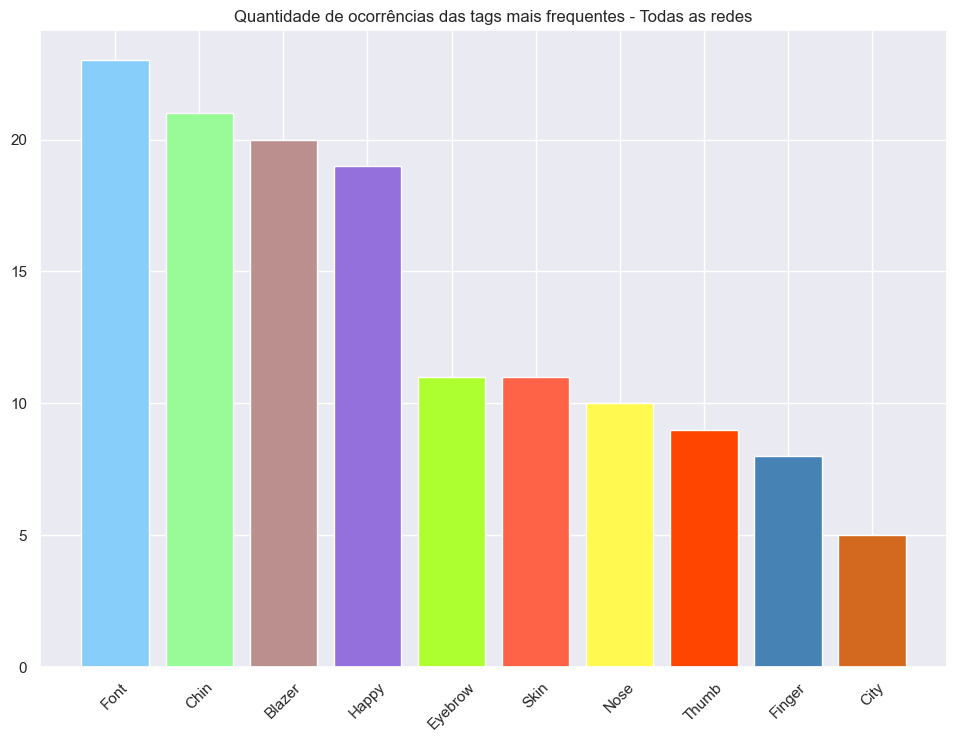

In [39]:
plot_top_tags(df_top_posts, df_tags, 'Todas as redes')

In [40]:
# Das postagens mais curtidas, quantas possuem as tags selecionadas no teste estatístico?
df_aux = df_top_posts.merge(df_tags, on='Class', how='inner')
num_posts = len( df_aux['ID'].unique() )
print(f"Top-{TOP_POSTS_OVERALL} posts (de todas as redes) que contêm tags selecionadas no teste estatístico: {num_posts} ({100*num_posts/TOP_POSTS_OVERALL:.1f}%)")

Top-100 posts (de todas as redes) que contêm tags selecionadas no teste estatístico: 75 (75.0%)


In [41]:
# De todas as tags selecionadas no teste estatístico, quantas aparecem nos posts mais curtidos?
df_aux = df_top_posts.merge(df_tags, on='Class', how='inner')
num_tags = len( df_aux['Class'].unique() )
print(f"Tags selecionadas que aparecem nos top-{TOP_POSTS_OVERALL} posts (todas as redes): {num_tags} ({100*num_tags/len(selected_tags):.1f}%)")

Tags selecionadas que aparecem nos top-100 posts (todas as redes): 13 (86.7%)


### 4.2 - Análise por Rede

In [42]:
TOP_POSTS_PER_NET = 100

In [43]:
# Seleciona os 100 posts com mais curtidas para cada rede, junto com suas tags
# E guarda em um dicionário indexado pelo nome da rede
dict_top_posts = {}
for network in SOCIAL_NETS:
    # seleciona os posts da rede e ordena por curtidas
    df_aux = df_posts.loc[df_posts['Rede'] == network]
    df_aux = df_aux.sort_values(by=['Curtidas'], ascending=False)

    # seleciona os top IDs com mais curtidas
    top_ids = df_aux[['ID', 'Curtidas']].drop_duplicates().head(TOP_POSTS_PER_NET)['ID'].values

    # seleciona os posts com os top IDs
    df_aux = df_aux.loc[df_aux['ID'].isin(top_ids)]
    df_aux.reset_index(drop=True, inplace=True)

    assert len( df_aux['ID'].unique() ) == TOP_POSTS_PER_NET, f"Quantidade de posts está errada para {network}: {len( df_aux['ID'].unique() )}!"

    dict_top_posts[network] = df_aux

In [44]:
for network in SOCIAL_NETS:
    df_aux = dict_top_posts[network]
    print('Faixa de valores das curtidas normalizadas para', network,':', df_aux['Curtidas Normalizadas'].min(), '-', df_aux['Curtidas Normalizadas'].max())
    print('Faixa de valores das curtidas para', network,':', df_aux['Curtidas'].min(), '-', df_aux['Curtidas'].max())

Faixa de valores das curtidas normalizadas para instagram : 0.195368 - 1.0
Faixa de valores das curtidas para instagram : 519349 - 2594701


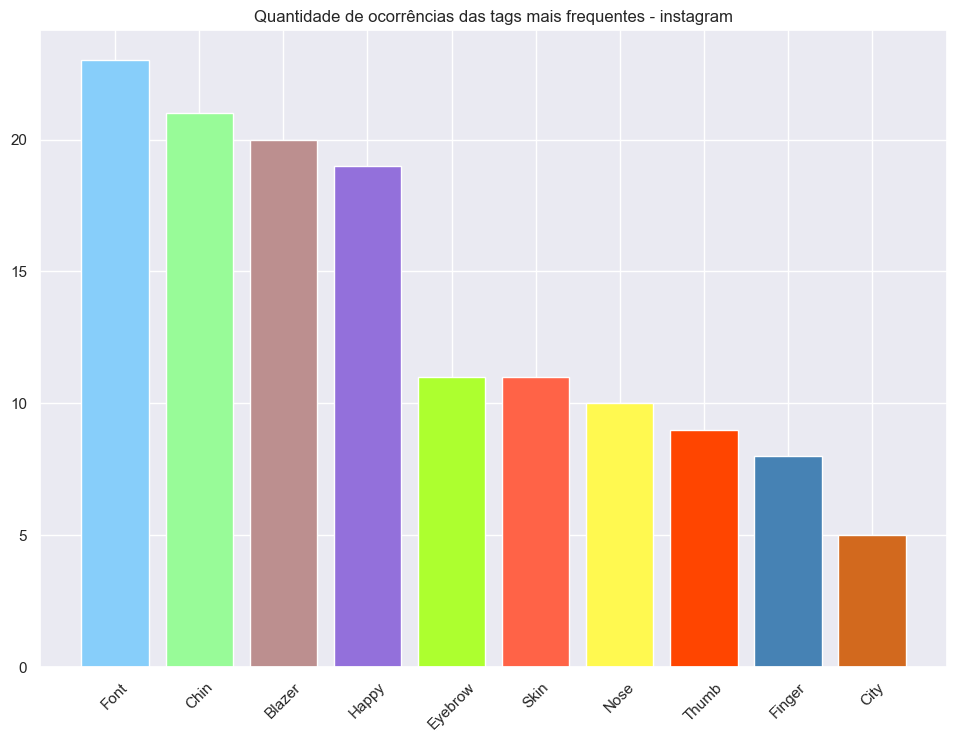

In [45]:
# Para cada rede
# Conta as ocorrências de cada tag nos posts com mais curtidas
# E mostra um gráfico de barras (por rede) indicando a quantidade de ocorrências de cada tag
for network in SOCIAL_NETS:
    df_aux = dict_top_posts[network]
    plot_top_tags(df_aux, df_tags, network)

In [46]:
# Das postagens mais curtidas, quantas possuem as tags selecionadas nos testes estatísticos?
print(f"Top-{TOP_POSTS_PER_NET} posts de cada rede que contêm alguma das tags selecionadas nos testes estatísticos:")
for network in SOCIAL_NETS:
    df_aux = dict_top_posts[network]
    df_aux = df_aux.merge(df_tags, on='Class', how='inner')
    num_posts = len( df_aux['ID'].unique() )
    print(f" - {network}: {num_posts} ({100*num_posts/TOP_POSTS_PER_NET:.1f}%)")


Top-100 posts de cada rede que contêm alguma das tags selecionadas nos testes estatísticos:
 - instagram: 75 (75.0%)


In [47]:
# De todas as tags selecionadas nos testes estatísticos, quantas aparecem nos posts mais curtidos?
print(f"Tags selecionadas que aparecem nos top-{TOP_POSTS_PER_NET} posts de cada rede:")
for network in SOCIAL_NETS:
    df_aux = dict_top_posts[network]
    df_aux = df_aux.merge(df_tags, on='Class', how='inner')
    num_tags = len( df_aux['Class'].unique() )
    print(f" - {network}: {num_tags} ({100*num_tags/len(selected_tags):.1f}%)")

Tags selecionadas que aparecem nos top-100 posts de cada rede:
 - instagram: 13 (86.7%)
